## Pmod ADC Reading Waveforms

This demonstration shows how to use the Pmod ADC (AD2). 

The Pmod ADC, and an analog signal generator are required for this demonstration. 

In this demonstration, an analog waveform is generated using the Digilent Analog Discovery 2, and the Waveforms software:

[Digilent Analog Discovery 2](http://store.digilentinc.com/analog-discovery-2-100msps-usb-oscilloscope-logic-analyzer-and-variable-power-supply/)

<td> <img src="http://cdn6.bigcommerce.com/s-7gavg/products/468/images/2617/Analog_Discovery_2_obl_Academic_600__01249.1447804398.1280.1280.png" alt="Drawing" style="width: 250px;"/> </td>

[WaveForms 2015](https://reference.digilentinc.com/waveforms3#newest):

<td> <img src="https://reference.digilentinc.com/_media/reference/software/waveforms/waveforms-3/waveforms3-0.png" alt="Drawing" style="width: 250px;"/> </td>


For the waveform to be displayed, we collect multiple points in each period. However, according to the Nyquist theorem, the sample rate only has to be $2\times$ the frequency of the signal.

The following block of code is just an example. For the Pmod ADC, the minimum delay between two samples is around $0.3\,$ms (corresponding to a sampling period of $3\,$kHz). So the maximum frequency of the input signal can be $1.5\,$kHz.

For the interface ID used in the following example, if the Pmod ADC is connected to interface PMODA, type in `PMODA`; if the Pmod ADC is connected to interface PMODB, type in `PMODB`.

For the WaveForms configuration, this example uses the following parameters:

| Wavegen Parameters | Configuration  |
| ---------------------- |
| Type           | Sine |
| Amplitude      | 1V |
| Offset         | 1V |
| Symmetry       | 50% |
| Phase          | 0  |

Channel 0 (V1) on Pmod ADC is connected to port W1 on Digilent Analog Discovery 2.

Type in the interface ID used (PMODA or PMODB): PMODB
Type in the frequency/Hz of the waveform: 200


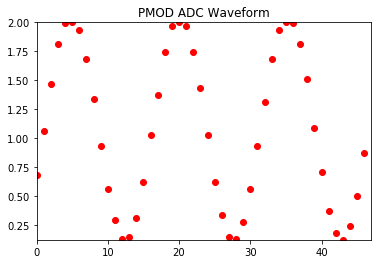

In [1]:
from time import sleep
from pynq.overlays.base import BaseOverlay
from pynq.lib import Pmod_ADC

base = BaseOverlay("base.bit")


if_id = input("Type in the interface ID used (PMODA or PMODB): ")
if if_id.upper()=='PMODA':
    adc = Pmod_ADC(base.PMODA)
else:
    adc = Pmod_ADC(base.PMODB)

freq = int(input("Type in the frequency/Hz of the waveform: "))
period = 1/freq
log_interval_us = 0

# Assume Channel 0 is connected to the waveform generator
adc.start_log(1,0,0,log_interval_us)
sleep(3*period)
log = adc.get_log()

# Draw the figure
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(log)), log, 'ro')
plt.title('PMOD ADC Waveform')
plt.axis([0, len(log), min(log), max(log)])
plt.show()

adc.reset()
del adc,base